### **NORMAL**

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz

In [ ]:
!tar xf spark-3.0.1-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark
!pip install pyspark

     |████████████████████████████████| 204.2MB 70kB/s 
     |████████████████████████████████| 204kB 44.9MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=89767ed3fb520bc1876483b9ab482484fe2396f4381efecc8165dc37541f4120
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 14.8MB 298kB/s 
     |████████████████████████████████| 10.9MB 11.5MB/s 


In [ ]:
!pip install descartes

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# import plotly.express as px
# import plotly.graph_objects as go
# import plotly.figure_factory as ff
# from plotly.colors import n_colors
# from plotly.subplots import make_subplots
# init_notebook_mode(connected=True)
# import cufflinks as cf
# cf.go_offline()

In [ ]:
victims = pd.read_csv('20_Victims_of_rape.csv')
police_hr = pd.read_csv('35_Human_rights_violation_by_police.csv')
auto_theft = pd.read_csv('30_Auto_theft.csv')
prop_theft = pd.read_csv('10_Property_stolen_and_recovered.csv')

In [ ]:
inc_victims = victims[victims['Subgroup']=='Victims of Incest Rape']

g = pd.DataFrame(inc_victims.groupby(['Year'])['Rape_Cases_Reported'].sum().reset_index())
g.columns = ['Year','Cases Reported']
g.head()

,Year,Cases Reported
0,2001,439
1,2002,369
2,2003,399
3,2004,505
4,2005,750


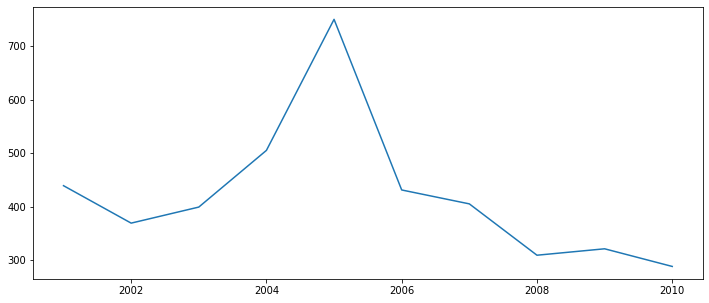

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(g['Year'],g['Cases Reported'])
plt.show()

In [ ]:
g1 = pd.DataFrame(inc_victims.groupby(['Area_Name'])['Rape_Cases_Reported'].sum().reset_index())
g1.columns = ['State/UT','Cases Reported']
old = ['Andaman & Nicobar Islands','Dadra & Nagar Haveli','Jammu & Kashmir','Puducherry','Daman & Diu','Odisha']
new = ['Andaman and Nicobar Islands','Dadra and Nagar Haveli','Jammu and Kashmir','Pondicherry','Daman and Diu','Orissa']
g1.replace(to_replace=old,value=new,inplace=True)

g1['State/UT'] = g1['State/UT'].str.upper()
# g1.head()
print(g1)

                       State/UT  Cases Reported
0   ANDAMAN AND NICOBAR ISLANDS               1
1                ANDHRA PRADESH              70
2             ARUNACHAL PRADESH               0
3                         ASSAM             101
4                         BIHAR              43
5                    CHANDIGARH              17
6                  CHHATTISGARH             532
7        DADRA AND NAGAR HAVELI               0
8                 DAMAN AND DIU               0
9                         DELHI             231
10                          GOA               7
11                      GUJARAT              97
12                      HARYANA             149
13             HIMACHAL PRADESH              43
14            JAMMU AND KASHMIR              12
15                    JHARKHAND             321
16                    KARNATAKA              46
17                       KERALA             128
18                  LAKSHADWEEP               0
19               MADHYA PRADESH         

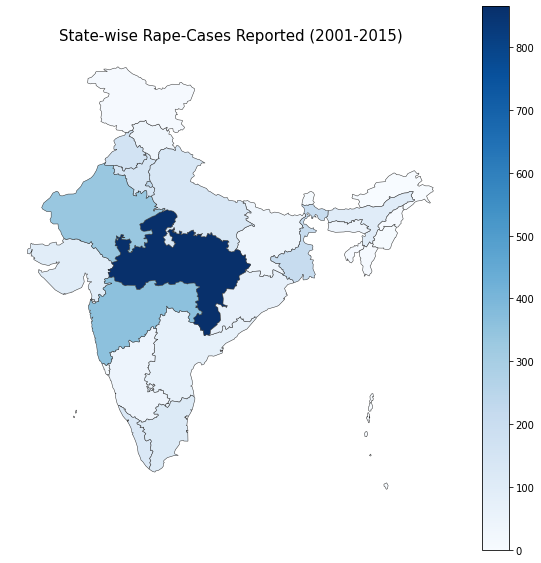

In [ ]:
shp_gdf = gpd.read_file('india_st.shp')
# print(shp_gdf)
merged = shp_gdf.set_index('STATE').join(g1.set_index('State/UT'))
merged['Cases Reported'].replace('NaN',0,inplace=True)

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Rape-Cases Reported (2001-2015)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='Blues', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)


In [ ]:
g3 = pd.DataFrame(police_hr.groupby(['Year'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
g3.columns = ['Year','Cases Registered']
g3.head()

,Year,Cases Registered
0,2001,366.0
1,2002,190.0
2,2003,170.0
3,2004,88.0
4,2005,68.0


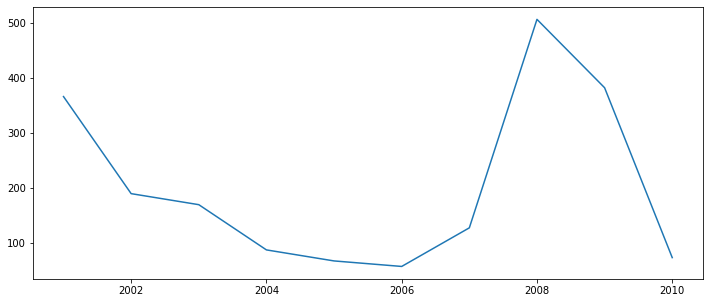

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(g3['Year'],g3['Cases Registered'])
plt.show()

In [ ]:
g2 = pd.DataFrame(police_hr.groupby(['Area_Name'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
g2.columns = ['State/UT','Cases Reported']
g2.head()

,State/UT,Cases Reported
0,Andhra Pradesh,226.0
1,Arunachal Pradesh,40.0
2,Assam,302.0
3,Bihar,52.0
4,Chandigarh,2.0


In [ ]:
g2.replace(to_replace=old,value=new,inplace=True)
new_row = pd.Series(data = {'State/UT': 'TRIPURA', 'Cases Reported' : 0})
g2 = g2.append(new_row,ignore_index=True)
new_row = pd.Series(data = {'State/UT': 'UTTAR PRADESH', 'Cases Reported' : 0})
g2 = g2.append(new_row,ignore_index=True)
new_row = pd.Series(data = {'State/UT': 'WEST BENGAL', 'Cases Reported' : 0})
g2 = g2.append(new_row,ignore_index=True)
g2['State/UT'] = g2['State/UT'].str.upper()
print(g2)

             State/UT  Cases Reported
0      ANDHRA PRADESH           226.0
1   ARUNACHAL PRADESH            40.0
2               ASSAM           302.0
3               BIHAR            52.0
4          CHANDIGARH             2.0
5        CHHATTISGARH           624.0
6       DAMAN AND DIU             0.0
7               DELHI            24.0
8                 GOA             6.0
9             GUJARAT           226.0
10            HARYANA            22.0
11   HIMACHAL PRADESH             0.0
12  JAMMU AND KASHMIR            36.0
13          JHARKHAND             6.0
14          KARNATAKA            74.0
15             KERALA            16.0
16     MADHYA PRADESH            16.0
17        MAHARASHTRA            90.0
18            MANIPUR             6.0
19          MEGHALAYA             0.0
20            MIZORAM             0.0
21           NAGALAND             0.0
22             ORISSA            62.0
23        PONDICHERRY             2.0
24             PUNJAB            22.0
25          

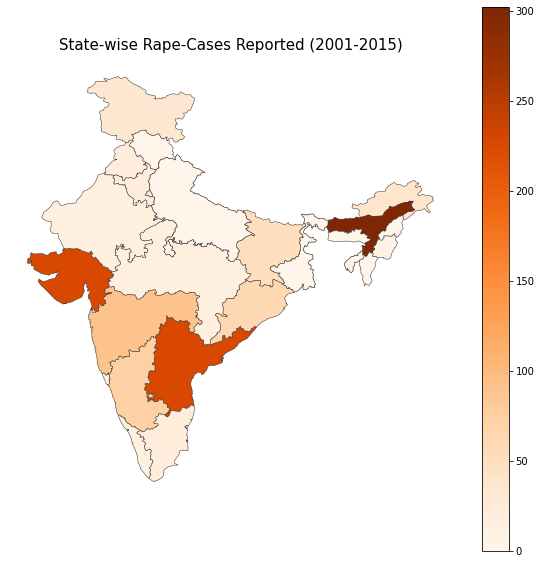

In [ ]:
shp_gdf = gpd.read_file('india_st.shp')
merged = shp_gdf.set_index('STATE').join(g2.set_index('State/UT'))
merged['Cases Reported'].replace('NaN',0)#,inplace=True)

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Rape-Cases Reported (2001-2015)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='Oranges', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)


### **SPARK**

##### **SPARK INSTALLATION**

In [ ]:
from pyspark import SparkContext

In [ ]:
sc = SparkContext()

In [ ]:
from pyspark.sql import DataFrameReader,SparkSession

In [ ]:
spark = SparkSession.builder.master("local[9]").appName('CrimeAnalysis').getOrCreate()

##### **Auto Theft Cases**

In [ ]:
dataset = spark.read.options(header='True', infershema=True) \
  .csv('30_Auto_theft.csv')

In [ ]:
dataset.printSchema()

root
 |-- Area_Name: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Group_Name: string (nullable = true)
 |-- Sub_Group_Name: string (nullable = true)
 |-- Auto_Theft_Coordinated/Traced: string (nullable = true)
 |-- Auto_Theft_Recovered: string (nullable = true)
 |-- Auto_Theft_Stolen: string (nullable = true)



In [ ]:
dataset.show()

+--------------------+----+--------------------+--------------------+-----------------------------+--------------------+-----------------+
|           Area_Name|Year|          Group_Name|      Sub_Group_Name|Auto_Theft_Coordinated/Traced|Auto_Theft_Recovered|Auto_Theft_Stolen|
+--------------------+----+--------------------+--------------------+-----------------------------+--------------------+-----------------+
|Andaman & Nicobar...|2001|AT1-Motor Cycles/...|1. Motor Cycles/ ...|                         NULL|                   4|                4|
|      Andhra Pradesh|2001|AT1-Motor Cycles/...|1. Motor Cycles/ ...|                          136|                1311|             2725|
|   Arunachal Pradesh|2001|AT1-Motor Cycles/...|1. Motor Cycles/ ...|                            0|                  21|               27|
|               Assam|2001|AT1-Motor Cycles/...|1. Motor Cycles/ ...|                            0|                  94|              205|
|               Bihar|2001|

In [ ]:
int_features = ['Year','Auto_Theft_Coordinated/Traced','Auto_Theft_Recovered','Auto_Theft_Stolen']
for c in int_features:
  dataset = dataset.withColumn(c,dataset[c].cast('int'))

In [ ]:
dataset.printSchema()

root
 |-- Area_Name: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Group_Name: string (nullable = true)
 |-- Sub_Group_Name: string (nullable = true)
 |-- Auto_Theft_Coordinated/Traced: integer (nullable = true)
 |-- Auto_Theft_Recovered: integer (nullable = true)
 |-- Auto_Theft_Stolen: integer (nullable = true)



In [ ]:
dataset.describe(dataset.columns).show()

+-------+--------------------+------------------+--------------------+--------------------+-----------------------------+--------------------+------------------+
|summary|           Area_Name|              Year|          Group_Name|      Sub_Group_Name|Auto_Theft_Coordinated/Traced|Auto_Theft_Recovered| Auto_Theft_Stolen|
+-------+--------------------+------------------+--------------------+--------------------+-----------------------------+--------------------+------------------+
|  count|                1865|              1865|                1865|                1865|                         1519|                1837|              1865|
|   mean|                null| 2005.564075067024|                null|                null|            74.54114549045424|   297.9270549809472|  1029.43163538874|
| stddev|                null|2.8535980816384146|                null|                null|            270.1951268498205|   677.4455119722735|2399.3899322452876|
|    min|Andaman & Nicobar..

In [ ]:
from pyspark.sql.functions import col,count,isnan,when

In [ ]:
dataset.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in dataset.columns]).show()

+---------+----+----------+--------------+-----------------------------+--------------------+-----------------+
|Area_Name|Year|Group_Name|Sub_Group_Name|Auto_Theft_Coordinated/Traced|Auto_Theft_Recovered|Auto_Theft_Stolen|
+---------+----+----------+--------------+-----------------------------+--------------------+-----------------+
|        0|   0|         0|             0|                          346|                  28|                0|
+---------+----+----------+--------------+-----------------------------+--------------------+-----------------+



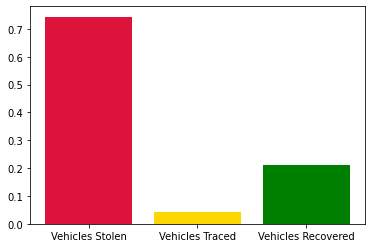

In [ ]:
g7 = dataset.agg({'Auto_Theft_Coordinated/Traced':'sum'})
g8 = dataset.agg({'Auto_Theft_Recovered':'sum'})
g9 = dataset.agg({'Auto_Theft_Stolen':'sum'})

g7 = g7.toPandas()
g8 = g8.toPandas()
g9 = g9.toPandas()

auto_theft_traced = list(g7['sum(Auto_Theft_Coordinated/Traced)'])
auto_theft_recovered = list(g8['sum(Auto_Theft_Recovered)'])
auto_theft_stolen = list(g9['sum(Auto_Theft_Stolen)'])

total = auto_theft_stolen[0]+auto_theft_traced[0]+auto_theft_recovered[0]

vehicle_group = np.array(['Vehicles Stolen','Vehicles Traced','Vehicles Recovered'])
vehicle_vals = np.array([(auto_theft_stolen[0]/total),(auto_theft_traced[0]/total),(auto_theft_recovered[0]/total)])

colors = ['crimson','gold','green']
plt.bar(vehicle_group,vehicle_vals,color=colors)

# plt.savefig('Theftfig_1.jpg',bbox_inches='tight')

plt.show()

In [ ]:
g10 = dataset.select('Sub_Group_Name').distinct()

g10 = g10.toPandas()
g10 = sorted(g10['Sub_Group_Name'])
print('TYPES OF VEHICLES STOLEN')
g10[0:5]

TYPES OF VEHICLES STOLEN


['1. Motor Cycles/ Scooters',
 '2. Motor Car/Taxi/Jeep',
 '3. Buses',
 '4. Goods carrying vehicles (Trucks/Tempo etc)',
 '5. Other Motor vehicles']

In [ ]:
g6 = dataset.groupby(['Area_Name']).agg({'Auto_Theft_Stolen':'sum'})
g6.show()

india1 = g6.toPandas()
india1.columns = ['State','Vehicle_Stolen']
old = ['Andaman & Nicobar Islands','Dadra & Nagar Haveli','Jammu & Kashmir','Puducherry','Daman & Diu','Odisha']
new = ['Andaman and Nicobar Islands','Dadra and Nagar Haveli','Jammu and Kashmir','Pondicherry','Daman and Diu','Orissa']
india1.replace(to_replace=old,value=new,inplace=True)

india1['State'] = india1['State'].str.upper()

+-----------------+----------------------+
|        Area_Name|sum(Auto_Theft_Stolen)|
+-----------------+----------------------+
|         Nagaland|                  4014|
|        Karnataka|                134254|
|           Odisha|                 33144|
|           Kerala|                 37480|
|       Tamil Nadu|                 82306|
|     Chhattisgarh|                 33310|
|   Andhra Pradesh|                113618|
|      Lakshadweep|                    22|
|   Madhya Pradesh|                155380|
|           Punjab|                 35484|
|          Manipur|                  3388|
|      Daman & Diu|                   510|
|  Jammu & Kashmir|                 13088|
|              Goa|                  4404|
|          Mizoram|                   868|
| Himachal Pradesh|                  4750|
|       Puducherry|                  7082|
|          Haryana|                118926|
|        Jharkhand|                 26826|
|Arunachal Pradesh|                  1658|
+----------

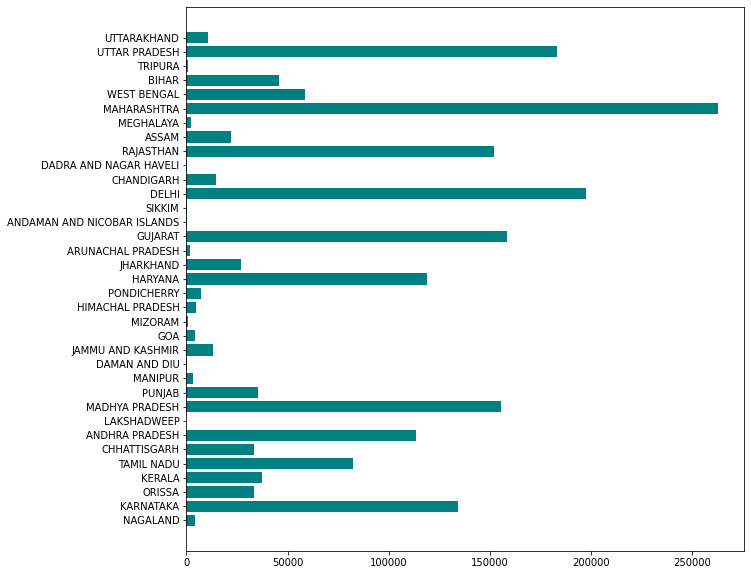

In [ ]:
plt.figure(figsize = (10,10))
plt.barh(india1['State'],india1['Vehicle_Stolen'], color = '#008080')
# plt.savefig('Theftfig_2.jpg',bbox_inches='tight')
plt.show()

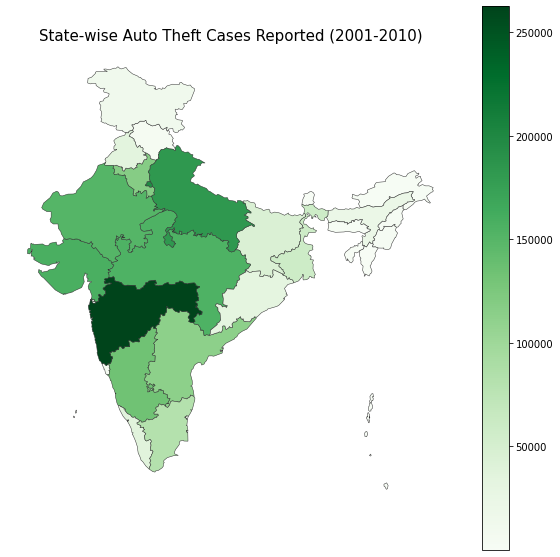

In [ ]:
# import geopandas as gpd

shp_gdf = gpd.read_file('india_st.shp')

merged = shp_gdf.set_index('STATE').join(india1.set_index('State'))
merged['Vehicle_Stolen'].replace('NaN',0,inplace=True)

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Auto Theft Cases Reported (2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Vehicle_Stolen', cmap='Greens', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
# plt.savefig('Theftfig_3.jpg',bbox_inches='tight')

In [ ]:
g5 = dataset.groupby(['Year']).agg({'Auto_Theft_Stolen':'sum'})
g5.show()

+----+----------------------+
|Year|sum(Auto_Theft_Stolen)|
+----+----------------------+
|2003|                138976|
|2007|                197860|
|2006|                182200|
|2004|                162746|
|2009|                277200|
|2001|                125542|
|2005|                169350|
|2010|                291388|
|2008|                239334|
|2002|                135294|
+----+----------------------+



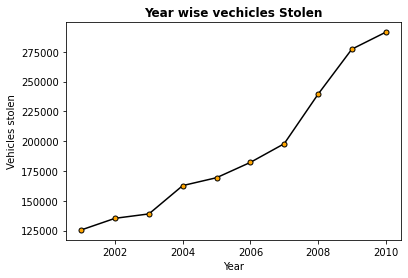

In [ ]:
from pyspark.sql import functions as f
# import matplotlib.pyplot as plt
# %matplotlib inline

g5 = g5.orderBy(f.col('Year').asc())
# g5.show()

plot1 = g5.toPandas()
# print(plot1)
plt.plot(plot1['Year'],plot1['sum(Auto_Theft_Stolen)'],c = 'black', marker = 'o',markerfacecolor = 'orange',markersize = 5)
plt.title('Year wise vechicles Stolen',weight = 'bold')
plt.xlabel('Year')
plt.ylabel('Vehicles stolen')
# plt.savefig('Theftfig_4.jpg',bbox_inches='tight')
plt.show()

In [ ]:
plot1 = spark.createDataFrame(plot1)
plot1.show()

+----+----------------------+
|Year|sum(Auto_Theft_Stolen)|
+----+----------------------+
|2001|                125542|
|2002|                135294|
|2003|                138976|
|2004|                162746|
|2005|                169350|
|2006|                182200|
|2007|                197860|
|2008|                239334|
|2009|                277200|
|2010|                291388|
+----+----------------------+



In [ ]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = ['Year'], outputCol = 'features')
vdataset = vectorAssembler.transform(plot1)
vdataset = vdataset.select(['features', 'sum(Auto_Theft_Stolen)'])
vdataset.show(3)

+--------+----------------------+
|features|sum(Auto_Theft_Stolen)|
+--------+----------------------+
|[2001.0]|                125542|
|[2002.0]|                135294|
|[2003.0]|                138976|
+--------+----------------------+
only showing top 3 rows



In [ ]:
splits = vdataset.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [ ]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='sum(Auto_Theft_Stolen)', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [18893.42671579742]
Intercept: -37696260.9568712


In [ ]:
trainingSummary = lr_model.summary
print('RMSE\t: %f' %trainingSummary.rootMeanSquaredError)
print('R2\t: %f' %trainingSummary.r2)

RMSE	: 14433.013294
R2	: 0.944780


In [ ]:
train_df.describe().show()

+-------+----------------------+
|summary|sum(Auto_Theft_Stolen)|
+-------+----------------------+
|  count|                     8|
|   mean|              196868.0|
| stddev|     65660.47472088081|
|    min|                125542|
|    max|                291388|
+-------+----------------------+



In [ ]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","sum(Auto_Theft_Stolen)","features").show(5)

+------------------+----------------------+--------+
|        prediction|sum(Auto_Theft_Stolen)|features|
+------------------+----------------------+--------+
| 166166.1815868318|                162746|[2004.0]|
|203953.03501842916|                182200|[2006.0]|
+------------------+----------------------+--------+



In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol='sum(Auto_Theft_Stolen)',metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = -1.56246


In [ ]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 15570.7


In [ ]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 6
objectiveHistory: [0.5, 0.4034535082098369, 0.1215741447540344, 0.05110430388969267, 0.03348684367221596, 0.027614356943442706]
+-------------------+
|          residuals|
+-------------------+
|  16056.09856055677|
|  6914.671844758093|
| -8296.754871040583|
|-15709.608302630484|
|-24986.461734227836|
| -2405.888450026512|
| 16566.684834174812|
| 11861.258118383586|
+-------------------+



In [ ]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","sum(Auto_Theft_Stolen)","features").show()

+------------------+----------------------+--------+
|        prediction|sum(Auto_Theft_Stolen)|features|
+------------------+----------------------+--------+
| 166166.1815868318|                162746|[2004.0]|
|203953.03501842916|                182200|[2006.0]|
+------------------+----------------------+--------+



In [ ]:
plot2 = train_df.union(test_df)

In [ ]:
plot2 = plot2.orderBy(f.col('features').asc())

In [ ]:
pred = lr_model.transform(plot2)
pred.select("prediction","sum(Auto_Theft_Stolen)","features").show()

+------------------+----------------------+--------+
|        prediction|sum(Auto_Theft_Stolen)|features|
+------------------+----------------------+--------+
|109485.90143944323|                125542|[2001.0]|
| 128379.3281552419|                135294|[2002.0]|
|147272.75487104058|                138976|[2003.0]|
| 166166.1815868318|                162746|[2004.0]|
|185059.60830263048|                169350|[2005.0]|
|203953.03501842916|                182200|[2006.0]|
|222846.46173422784|                197860|[2007.0]|
| 241739.8884500265|                239334|[2008.0]|
| 260633.3151658252|                277200|[2009.0]|
| 279526.7418816164|                291388|[2010.0]|
+------------------+----------------------+--------+



In [ ]:
pred.show()

+--------+----------------------+------------------+
|features|sum(Auto_Theft_Stolen)|        prediction|
+--------+----------------------+------------------+
|[2001.0]|                125542|109485.90143944323|
|[2002.0]|                135294| 128379.3281552419|
|[2003.0]|                138976|147272.75487104058|
|[2004.0]|                162746| 166166.1815868318|
|[2005.0]|                169350|185059.60830263048|
|[2006.0]|                182200|203953.03501842916|
|[2007.0]|                197860|222846.46173422784|
|[2008.0]|                239334| 241739.8884500265|
|[2009.0]|                277200| 260633.3151658252|
|[2010.0]|                291388| 279526.7418816164|
+--------+----------------------+------------------+



In [ ]:
pred = pred.toPandas()

In [ ]:
list(lr_model.coefficients)[0]

18893.42671579742

In [ ]:
# plot2['features'] 
# x = (plot2['features'])
pred['features']= list(pred['features'])

x = (pred['prediction'])
y = []
for i in pred['features']:
  y.append(list(i)[0])

print(x)
print(y)

0    109485.901439
1    128379.328155
2    147272.754871
3    166166.181587
4    185059.608303
5    203953.035018
6    222846.461734
7    241739.888450
8    260633.315166
9    279526.741882
Name: prediction, dtype: float64
[2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0]


In [ ]:
plot1 = plot1.toPandas()

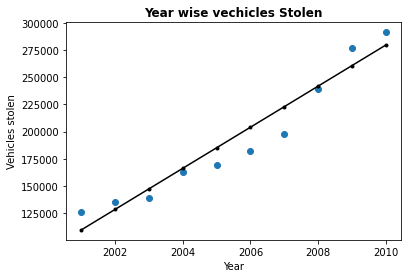

In [ ]:
plt.plot(y,x,c = 'black', marker = '.')
plt.scatter(plot1['Year'],plot1['sum(Auto_Theft_Stolen)'])
plt.title('Year wise vechicles Stolen',weight = 'bold')
plt.xlabel('Year')
plt.ylabel('Vehicles stolen')
# plt.savefig('Theftfig_5.jpg',bbox_inches='tight')
plt.show()

#####**Property Theft Cases**

In [ ]:
dataset = spark.read.options(header='True', infershema=True) \
  .csv('10_Property_stolen_and_recovered.csv')

In [ ]:
dataset.printSchema()

root
 |-- Area_Name: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Group_Name: string (nullable = true)
 |-- Sub_Group_Name: string (nullable = true)
 |-- Cases_Property_Recovered: string (nullable = true)
 |-- Cases_Property_Stolen: string (nullable = true)
 |-- Value_of_Property_Recovered: string (nullable = true)
 |-- Value_of_Property_Stolen: string (nullable = true)



In [ ]:
dataset.show()

+--------------------+----+-------------------+--------------+------------------------+---------------------+---------------------------+------------------------+
|           Area_Name|Year|         Group_Name|Sub_Group_Name|Cases_Property_Recovered|Cases_Property_Stolen|Value_of_Property_Recovered|Value_of_Property_Stolen|
+--------------------+----+-------------------+--------------+------------------------+---------------------+---------------------------+------------------------+
|Andaman & Nicobar...|2001|Burglary - Property|   3. Burglary|                      27|                   64|                     755858|                 1321961|
|      Andhra Pradesh|2001|Burglary - Property|   3. Burglary|                    3321|                 7134|                   51483437|               147019348|
|   Arunachal Pradesh|2001|Burglary - Property|   3. Burglary|                      66|                  248|                     825115|                 4931904|
|               Assam|

In [ ]:
int_features = ['Year','Cases_Property_Recovered','Cases_Property_Stolen','Value_of_Property_Recovered','Value_of_Property_Stolen']
for c in int_features:
  dataset = dataset.withColumn(c,dataset[c].cast('int'))

In [ ]:
dataset.printSchema()

root
 |-- Area_Name: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Group_Name: string (nullable = true)
 |-- Sub_Group_Name: string (nullable = true)
 |-- Cases_Property_Recovered: integer (nullable = true)
 |-- Cases_Property_Stolen: integer (nullable = true)
 |-- Value_of_Property_Recovered: integer (nullable = true)
 |-- Value_of_Property_Stolen: integer (nullable = true)



In [ ]:
dataset.describe(dataset.columns).show()

+-------+--------------------+------------------+-------------------+--------------------+------------------------+---------------------+---------------------------+------------------------+
|summary|           Area_Name|              Year|         Group_Name|      Sub_Group_Name|Cases_Property_Recovered|Cases_Property_Stolen|Value_of_Property_Recovered|Value_of_Property_Stolen|
+-------+--------------------+------------------+-------------------+--------------------+------------------------+---------------------+---------------------------+------------------------+
|  count|                2449|              2449|               2449|                2449|                    2449|                 2449|                       2446|                    2397|
|   mean|                null| 2005.499387505104|               null|                null|      1232.8922008983259|    3419.420988158432|        5.179076730171709E7|    1.4013265425990823E8|
| stddev|                null|2.8732943989660

In [ ]:
dataset.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in dataset.columns]).show()

+---------+----+----------+--------------+------------------------+---------------------+---------------------------+------------------------+
|Area_Name|Year|Group_Name|Sub_Group_Name|Cases_Property_Recovered|Cases_Property_Stolen|Value_of_Property_Recovered|Value_of_Property_Stolen|
+---------+----+----------+--------------+------------------------+---------------------+---------------------------+------------------------+
|        0|   0|         0|             0|                       0|                    0|                          3|                      52|
+---------+----+----------+--------------+------------------------+---------------------+---------------------------+------------------------+



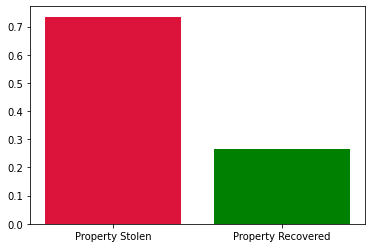

In [ ]:
g7 = dataset.agg({'Cases_Property_Recovered':'sum'})
g8 = dataset.agg({'Cases_Property_Stolen':'sum'})

g7 = g7.toPandas()
g8 = g8.toPandas()

theft_recovered = list(g7['sum(Cases_Property_Recovered)'])
theft_stolen = list(g8['sum(Cases_Property_Stolen)'])

total = theft_stolen[0]+theft_recovered[0]

vehicle_group = np.array(['Property Stolen','Property Recovered'])
vehicle_vals = np.array([(theft_stolen[0]/total),(theft_recovered[0]/total)])

colors = ['crimson','green']
plt.bar(vehicle_group,vehicle_vals,color=colors)
# plt.savefig('propertyfig_1.jpg',bbox_inches='tight')
plt.show()

In [ ]:
g10 = dataset.select('Sub_Group_Name').distinct()

g10 = g10.toPandas()
g10 = sorted(g10['Sub_Group_Name'])
print('TYPES OF PROPERTY STOLEN')
g10[0:6]

TYPES OF PROPERTY STOLEN


['1. Dacoity',
 '2. Robbery',
 '3. Burglary',
 '4. Theft',
 '5. Criminal Breach of Trust',
 '6. Other Property']

In [ ]:
g5 = dataset.groupby(['Year']).agg({'Cases_Property_Stolen':'sum'})
g5.show()

+----+--------------------------+
|Year|sum(Cases_Property_Stolen)|
+----+--------------------------+
|2003|                    755556|
|2007|                    857074|
|2006|                    813294|
|2004|                    812392|
|2009|                    911884|
|2001|                    790836|
|2005|                    799578|
|2010|                    946256|
|2008|                    912990|
|2002|                    774302|
+----+--------------------------+



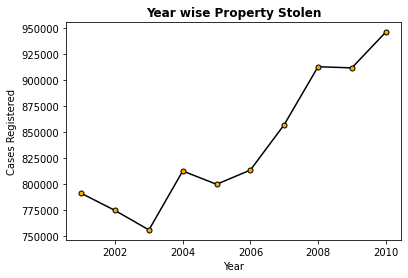

In [ ]:
g5 = g5.orderBy(f.col('Year').asc())
# g5.show()

plot1 = g5.toPandas()

plt.plot(plot1['Year'],plot1['sum(Cases_Property_Stolen)'],c = 'black', marker = 'o',markerfacecolor = 'orange',markersize = 5)
plt.title('Year wise Property Stolen',weight = 'bold')
plt.xlabel('Year')
plt.ylabel('Cases Registered')
# plt.savefig('propertyfig_2.jpg',bbox_inches='tight')
plt.show()

In [ ]:
g6 = dataset.groupby(['Area_Name']).agg({'Cases_Property_Stolen':'sum'})
g6.show()

india1 = g6.toPandas()
india1.columns = ['State','Property_Stolen']
old = ['Andaman & Nicobar Islands','Dadra & Nagar Haveli','Jammu & Kashmir','Puducherry','Daman & Diu','Odisha']
new = ['Andaman and Nicobar Islands','Dadra and Nagar Haveli','Jammu and Kashmir','Pondicherry','Daman and Diu','Orissa']
india1.replace(to_replace=old,value=new,inplace=True)

india1['State'] = india1['State'].str.upper()

+-----------------+--------------------------+
|        Area_Name|sum(Cases_Property_Stolen)|
+-----------------+--------------------------+
|         Nagaland|                     10814|
|        Karnataka|                    494968|
|           Odisha|                    224280|
|           Kerala|                    221652|
|       Tamil Nadu|                    431864|
|     Chhattisgarh|                    199712|
|   Andhra Pradesh|                    642822|
|      Lakshadweep|                       342|
|   Madhya Pradesh|                    733524|
|           Punjab|                    151182|
|          Manipur|                     11584|
|      Daman & Diu|                      2056|
|  Jammu & Kashmir|                     74906|
|              Goa|                     19788|
|          Mizoram|                     26892|
| Himachal Pradesh|                     34000|
|       Puducherry|                     14236|
|          Haryana|                    303336|
|        Jhar

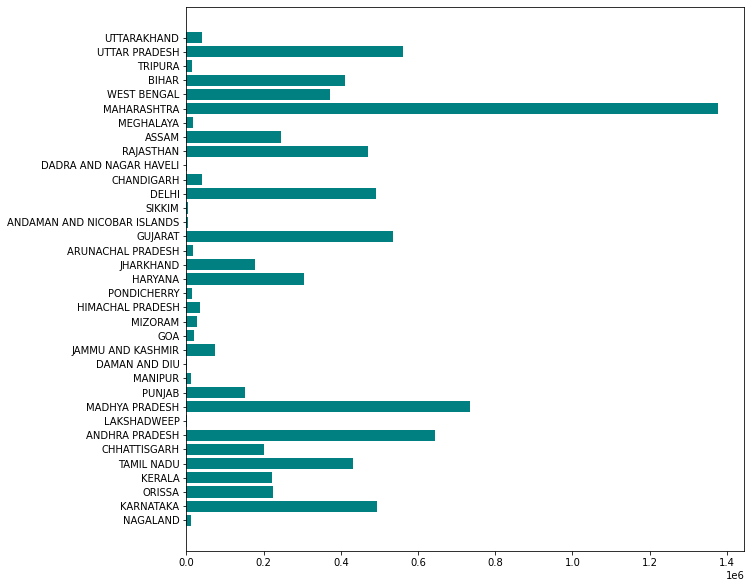

In [ ]:
plt.figure(figsize = (10,10))
plt.barh(india1['State'],india1['Property_Stolen'], color = '#008080')
# plt.savefig('propertyfig_3.jpg',bbox_inches='tight')
plt.show()

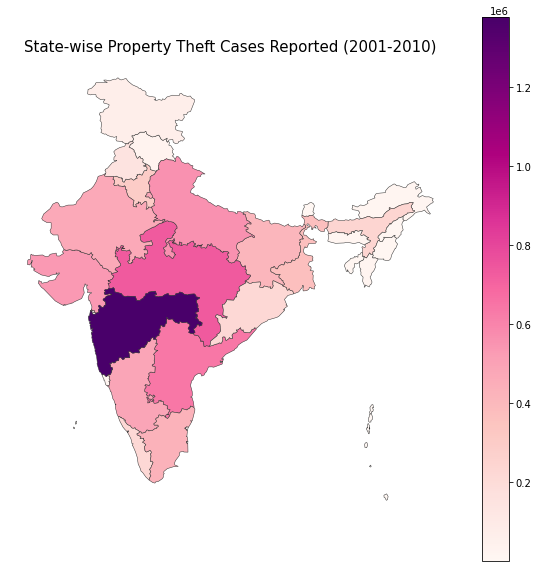

In [ ]:
# import geopandas as gpd

shp_gdf = gpd.read_file('india_st.shp')

merged = shp_gdf.set_index('STATE').join(india1.set_index('State'))
merged['Property_Stolen'].replace('NaN',0,inplace=True)

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Property Theft Cases Reported (2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Property_Stolen', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
# plt.savefig('propertyfig_4.jpg',bbox_inches='tight')

In [ ]:
plot1 = spark.createDataFrame(plot1)
plot1.show()

+----+--------------------------+
|Year|sum(Cases_Property_Stolen)|
+----+--------------------------+
|2001|                    790836|
|2002|                    774302|
|2003|                    755556|
|2004|                    812392|
|2005|                    799578|
|2006|                    813294|
|2007|                    857074|
|2008|                    912990|
|2009|                    911884|
|2010|                    946256|
+----+--------------------------+



In [ ]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = ['Year'], outputCol = 'features')
vdataset = vectorAssembler.transform(plot1)
vdataset = vdataset.select(['features', 'sum(Cases_Property_Stolen)'])
vdataset.show(3)

+--------+--------------------------+
|features|sum(Cases_Property_Stolen)|
+--------+--------------------------+
|[2001.0]|                    790836|
|[2002.0]|                    774302|
|[2003.0]|                    755556|
+--------+--------------------------+
only showing top 3 rows



In [ ]:
splits = vdataset.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [ ]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='sum(Cases_Property_Stolen)', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [23854.509928546]
Intercept: -47012592.32857753


In [ ]:
trainingSummary = lr_model.summary
print('RMSE\t: %f' %trainingSummary.rootMeanSquaredError)
print('R2\t: %f' %trainingSummary.r2)

RMSE	: 15998.805428
R2	: 0.910214


In [ ]:
train_df.describe().show()

+-------+--------------------------+
|summary|sum(Cases_Property_Stolen)|
+-------+--------------------------+
|  count|                         5|
|   mean|                  868180.0|
| stddev|          59695.0973028774|
|    min|                    812392|
|    max|                    946256|
+-------+--------------------------+



In [ ]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","sum(Cases_Property_Stolen)","features").show(5)

+-----------------+--------------------------+--------+
|       prediction|sum(Cases_Property_Stolen)|features|
+-----------------+--------------------------+--------+
|720282.0384430066|                    790836|[2001.0]|
|744136.5483715534|                    774302|[2002.0]|
|767991.0583001003|                    755556|[2003.0]|
| 815700.078157194|                    799578|[2005.0]|
|887263.6079428345|                    912990|[2008.0]|
+-----------------+--------------------------+--------+



In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol='sum(Cases_Property_Stolen)',metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 0.543787


In [ ]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 37320.8


##### **Rape Cases**

In [ ]:
dataset = spark.read.options(header='True', infershema=True) \
  .csv('20_Victims_of_rape.csv')

In [ ]:
dataset.printSchema()

root
 |-- Area_Name: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Subgroup: string (nullable = true)
 |-- Rape_Cases_Reported: string (nullable = true)
 |-- Victims_Above_50_Yrs: string (nullable = true)
 |-- Victims_Between_10-14_Yrs: string (nullable = true)
 |-- Victims_Between_14-18_Yrs: string (nullable = true)
 |-- Victims_Between_18-30_Yrs: string (nullable = true)
 |-- Victims_Between_30-50_Yrs: string (nullable = true)
 |-- Victims_of_Rape_Total: string (nullable = true)
 |-- Victims_Upto_10_Yrs: string (nullable = true)



In [ ]:
dataset.show()

+--------------------+----+--------------------+-------------------+--------------------+-------------------------+-------------------------+-------------------------+-------------------------+---------------------+-------------------+
|           Area_Name|Year|            Subgroup|Rape_Cases_Reported|Victims_Above_50_Yrs|Victims_Between_10-14_Yrs|Victims_Between_14-18_Yrs|Victims_Between_18-30_Yrs|Victims_Between_30-50_Yrs|Victims_of_Rape_Total|Victims_Upto_10_Yrs|
+--------------------+----+--------------------+-------------------+--------------------+-------------------------+-------------------------+-------------------------+-------------------------+---------------------+-------------------+
|Andaman & Nicobar...|2001|  Total Rape Victims|                  3|                   0|                        0|                        3|                        0|                        0|                    3|                  0|
|Andaman & Nicobar...|2001|Victims of Incest...|        

In [ ]:
int_features = ['Year','Rape_Cases_Reported','Victims_Above_50_Yrs','Victims_Between_10-14_Yrs',
                'Victims_Between_14-18_Yrs','Victims_Between_18-30_Yrs','Victims_Between_30-50_Yrs',
                'Victims_of_Rape_Total','Victims_Upto_10_Yrs']
for c in int_features:
  dataset = dataset.withColumn(c,dataset[c].cast('int'))

In [ ]:
dataset.printSchema()

root
 |-- Area_Name: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Subgroup: string (nullable = true)
 |-- Rape_Cases_Reported: integer (nullable = true)
 |-- Victims_Above_50_Yrs: integer (nullable = true)
 |-- Victims_Between_10-14_Yrs: integer (nullable = true)
 |-- Victims_Between_14-18_Yrs: integer (nullable = true)
 |-- Victims_Between_18-30_Yrs: integer (nullable = true)
 |-- Victims_Between_30-50_Yrs: integer (nullable = true)
 |-- Victims_of_Rape_Total: integer (nullable = true)
 |-- Victims_Upto_10_Yrs: integer (nullable = true)



In [ ]:
dataset.describe(dataset.columns).show()

+-------+--------------------+------------------+--------------------+-------------------+--------------------+-------------------------+-------------------------+-------------------------+-------------------------+---------------------+-------------------+
|summary|           Area_Name|              Year|            Subgroup|Rape_Cases_Reported|Victims_Above_50_Yrs|Victims_Between_10-14_Yrs|Victims_Between_14-18_Yrs|Victims_Between_18-30_Yrs|Victims_Between_30-50_Yrs|Victims_of_Rape_Total|Victims_Upto_10_Yrs|
+-------+--------------------+------------------+--------------------+-------------------+--------------------+-------------------------+-------------------------+-------------------------+-------------------------+---------------------+-------------------+
|  count|                1050|              1050|                1050|               1050|                1050|                     1050|                     1050|                     1050|                     1050|           

In [ ]:
dataset.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in dataset.columns]).show()

+---------+----+--------+-------------------+--------------------+-------------------------+-------------------------+-------------------------+-------------------------+---------------------+-------------------+
|Area_Name|Year|Subgroup|Rape_Cases_Reported|Victims_Above_50_Yrs|Victims_Between_10-14_Yrs|Victims_Between_14-18_Yrs|Victims_Between_18-30_Yrs|Victims_Between_30-50_Yrs|Victims_of_Rape_Total|Victims_Upto_10_Yrs|
+---------+----+--------+-------------------+--------------------+-------------------------+-------------------------+-------------------------+-------------------------+---------------------+-------------------+
|        0|   0|       0|                  0|                   0|                        0|                        0|                        0|                        0|                    0|                  0|
+---------+----+--------+-------------------+--------------------+-------------------------+-------------------------+-------------------------+----

In [ ]:
g1 = dataset.agg({'Victims_Upto_10_Yrs':'sum'})
g2 = dataset.agg({'Victims_Between_10-14_Yrs':'sum'})
g3 = dataset.agg({'Victims_Between_14-18_Yrs':'sum'})
g4 = dataset.agg({'Victims_Between_18-30_Yrs':'sum'})
g5 = dataset.agg({'Victims_Between_30-50_Yrs':'sum'})
g6 = dataset.agg({'Victims_Above_50_Yrs':'sum'})

g1 = g1.toPandas()
g2 = g2.toPandas()
g3 = g3.toPandas()
g4 = g4.toPandas()
g5 = g5.toPandas()
g6 = g6.toPandas()

p1 = list(g1['sum(Victims_Upto_10_Yrs)'])
p2 = list(g2['sum(Victims_Between_10-14_Yrs)'])
p3 = list(g3['sum(Victims_Between_14-18_Yrs)'])
p4 = list(g4['sum(Victims_Between_18-30_Yrs)'])
p5 = list(g5['sum(Victims_Between_30-50_Yrs)'])
p6 = list(g6['sum(Victims_Above_50_Yrs)'])


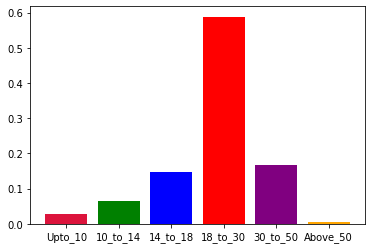

In [ ]:
total = p1[0]+p2[0]+p3[0]+p4[0]+p5[0]+p6[0]

vehicle_group = np.array(['Upto_10','10_to_14','14_to_18','18_to_30','30_to_50','Above_50'])
vehicle_vals = np.array([(p1[0]/total),(p2[0]/total),(p3[0]/total),(p4[0]/total),(p5[0]/total),(p6[0]/total)])

colors = ['crimson','green','blue','red','purple','orange']
plt.bar(vehicle_group,vehicle_vals,color=colors)
plt.show()

In [ ]:
g7 = dataset.groupby(['Year']).agg({'Rape_Cases_Reported':'sum'})
g7.show()

+----+------------------------+
|Year|sum(Rape_Cases_Reported)|
+----+------------------------+
|2003|                   31694|
|2007|                   41474|
|2006|                   38696|
|2004|                   36466|
|2009|                   42794|
|2001|                   32150|
|2005|                   36718|
|2010|                   44344|
|2008|                   42934|
|2002|                   32746|
+----+------------------------+



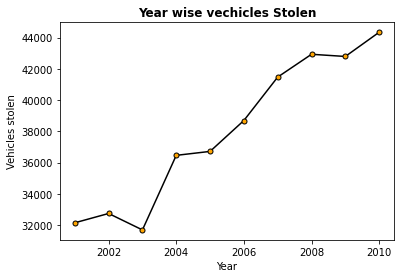

In [ ]:
g7 = g7.orderBy(f.col('Year').asc())
# g5.show()

plot1 = g7.toPandas()

plt.plot(plot1['Year'],plot1['sum(Rape_Cases_Reported)'],c = 'black', marker = 'o',markerfacecolor = 'orange',markersize = 5)
plt.title('Year wise vechicles Stolen',weight = 'bold')
plt.xlabel('Year')
plt.ylabel('Vehicles stolen')
plt.show()

In [ ]:
g8 = dataset.groupby(['Area_Name']).agg({'Rape_Cases_Reported':'sum'})
g8.show()

india1 = g8.toPandas()
india1.columns = ['State','Cases_Reported']
old = ['Andaman & Nicobar Islands','Dadra & Nagar Haveli','Jammu & Kashmir','Puducherry','Daman & Diu','Odisha']
new = ['Andaman and Nicobar Islands','Dadra and Nagar Haveli','Jammu and Kashmir','Pondicherry','Daman and Diu','Orissa']
india1.replace(to_replace=old,value=new,inplace=True)

india1['State'] = india1['State'].str.upper()

+-----------------+------------------------+
|        Area_Name|sum(Rape_Cases_Reported)|
+-----------------+------------------------+
|         Nagaland|                     352|
|        Karnataka|                    7834|
|           Odisha|                   17720|
|           Kerala|                   10592|
|       Tamil Nadu|                   11076|
|     Chhattisgarh|                   19502|
|   Andhra Pradesh|                   21392|
|      Lakshadweep|                      14|
|   Madhya Pradesh|                   58512|
|           Punjab|                    8600|
|          Manipur|                     542|
|      Daman & Diu|                      28|
|  Jammu & Kashmir|                    4460|
|              Goa|                     532|
|          Mizoram|                    1292|
| Himachal Pradesh|                    2906|
|       Puducherry|                     114|
|          Haryana|                   10018|
|        Jharkhand|                   15126|
|Arunachal

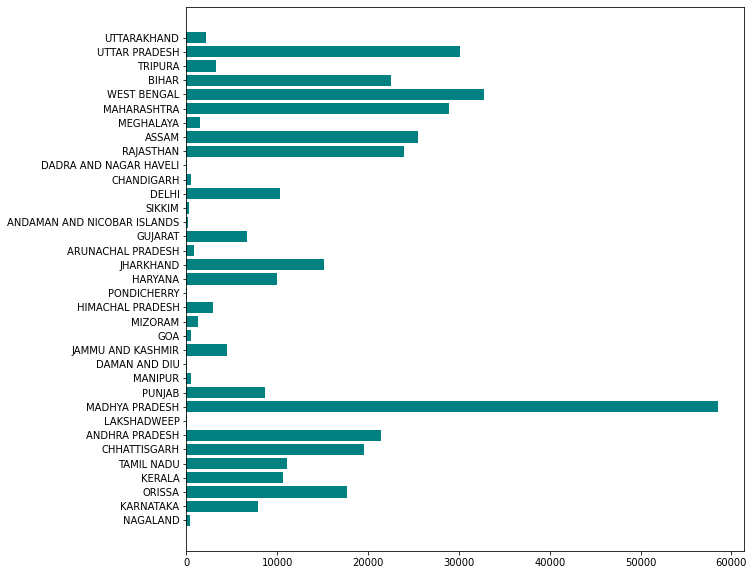

In [ ]:
plt.figure(figsize = (10,10))
plt.barh(india1['State'],india1['Cases_Reported'], color = '#008080')
plt.show()

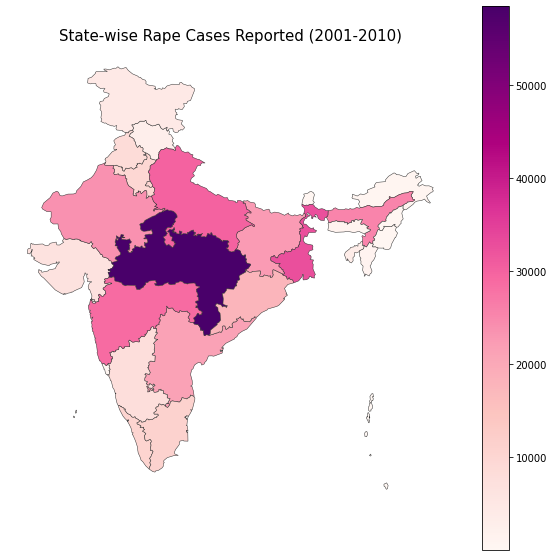

In [ ]:
# import geopandas as gpd

shp_gdf = gpd.read_file('india_st.shp')

merged = shp_gdf.set_index('STATE').join(india1.set_index('State'))
merged['Cases_Reported'].replace('NaN',0,inplace=True)

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Rape Cases Reported (2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases_Reported', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)


##### **Human Rights violation**

In [ ]:
dataset = spark.read.options(header='True', infershema=True) \
  .csv('35_Human_rights_violation_by_police.csv')

In [ ]:
dataset.printSchema()

root
 |-- Area_Name: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Group_Name: string (nullable = true)
 |-- Sub_Group_Name: string (nullable = true)
 |-- Cases_Registered_under_Human_Rights_Violations: string (nullable = true)
 |-- Policemen_Chargesheeted: string (nullable = true)
 |-- Policemen_Convicted: string (nullable = true)



In [ ]:
dataset.show()

+-----------------+----+--------------------+--------------------+----------------------------------------------+-----------------------+-------------------+
|        Area_Name|Year|          Group_Name|      Sub_Group_Name|Cases_Registered_under_Human_Rights_Violations|Policemen_Chargesheeted|Policemen_Convicted|
+-----------------+----+--------------------+--------------------+----------------------------------------------+-----------------------+-------------------+
|   Andhra Pradesh|2001|HR_Disappearance ...|01. Disappearance...|                                             0|                      0|                  0|
|Arunachal Pradesh|2001|HR_Disappearance ...|01. Disappearance...|                                             0|                      0|                  0|
|            Assam|2001|HR_Disappearance ...|01. Disappearance...|                                             0|                      0|                  0|
|            Bihar|2001|HR_Disappearance ...|01. Dis

In [ ]:
int_features = ['Year','Cases_Registered_under_Human_Rights_Violations','Policemen_Chargesheeted','Policemen_Convicted']
for c in int_features:
  dataset = dataset.withColumn(c,dataset[c].cast('int'))

In [ ]:
dataset.printSchema()

root
 |-- Area_Name: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Group_Name: string (nullable = true)
 |-- Sub_Group_Name: string (nullable = true)
 |-- Cases_Registered_under_Human_Rights_Violations: integer (nullable = true)
 |-- Policemen_Chargesheeted: integer (nullable = true)
 |-- Policemen_Convicted: integer (nullable = true)



In [ ]:
dataset.describe(dataset.columns).show()

+-------+--------------+------------------+--------------------+--------------------+----------------------------------------------+-----------------------+-------------------+
|summary|     Area_Name|              Year|          Group_Name|      Sub_Group_Name|Cases_Registered_under_Human_Rights_Violations|Policemen_Chargesheeted|Policemen_Convicted|
+-------+--------------+------------------+--------------------+--------------------+----------------------------------------------+-----------------------+-------------------+
|  count|          2267|              2267|                2267|                2267|                                          2265|                   2213|               2163|
|   mean|          null|2005.4137626819586|                null|                null|                            0.8962472406181016|     0.3940352462720289| 0.0758206195099399|
| stddev|          null| 2.801138543921524|                null|                null|                             6

In [ ]:
dataset.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in dataset.columns]).show()

+---------+----+----------+--------------+----------------------------------------------+-----------------------+-------------------+
|Area_Name|Year|Group_Name|Sub_Group_Name|Cases_Registered_under_Human_Rights_Violations|Policemen_Chargesheeted|Policemen_Convicted|
+---------+----+----------+--------------+----------------------------------------------+-----------------------+-------------------+
|        0|   0|         0|             0|                                             2|                     54|                104|
+---------+----+----------+--------------+----------------------------------------------+-----------------------+-------------------+



In [ ]:
g1 = dataset.agg({'Cases_Registered_under_Human_Rights_Violations':'sum'})
g2 = dataset.agg({'Policemen_Chargesheeted':'sum'})
g3 = dataset.agg({'Policemen_Convicted':'sum'})

g1 = g1.toPandas()
g2 = g2.toPandas()
g3 = g3.toPandas()

p1 = list(g1['sum(Cases_Registered_under_Human_Rights_Violations)'])
p2 = list(g2['sum(Policemen_Chargesheeted)'])
p3 = list(g3['sum(Policemen_Convicted)'])

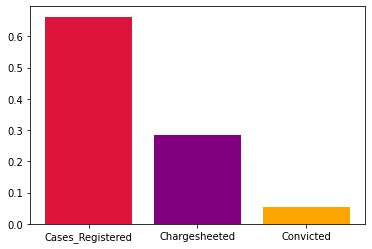

In [ ]:
total = p1[0]+p2[0]+p3[0]

vehicle_group = np.array(['Cases_Registered','Chargesheeted','Convicted'])
vehicle_vals = np.array([(p1[0]/total),(p2[0]/total),(p3[0]/total)])

colors = ['crimson','purple','orange']
plt.bar(vehicle_group,vehicle_vals,color=colors)
plt.show()

In [ ]:
g10 = dataset.select('Sub_Group_Name').distinct()

g10 = g10.toPandas()
g10 = sorted(g10['Sub_Group_Name'])
print('TYPES OF HUMAN RIGHTS VIOLATION')
g10[0:11]

TYPES OF HUMAN RIGHTS VIOLATION


['01. Disappearance of Persons',
 '02. Illegal Detention/Arrests',
 '03. Fake Encounter Killings',
 '04. Violation Against Terrorists/Extremists',
 '05. Extortion',
 '06. Torture',
 '07. False Implication',
 '08. Failure in Taking Action',
 '09. Indignity to Women',
 '10. Atrocities on SC/ST',
 '11. Others']

In [ ]:
g7 = dataset.groupby(['Year']).agg({'Cases_Registered_under_Human_Rights_Violations':'sum'})
g7.show()

+----+---------------------------------------------------+
|Year|sum(Cases_Registered_under_Human_Rights_Violations)|
+----+---------------------------------------------------+
|2003|                                                170|
|2007|                                                128|
|2006|                                                 58|
|2004|                                                 88|
|2009|                                                382|
|2001|                                                366|
|2005|                                                 68|
|2010|                                                 74|
|2008|                                                506|
|2002|                                                190|
+----+---------------------------------------------------+



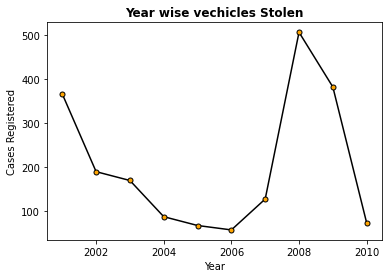

In [ ]:
g7 = g7.orderBy(f.col('Year').asc())
# g5.show()

plot1 = g7.toPandas()

plt.plot(plot1['Year'],plot1['sum(Cases_Registered_under_Human_Rights_Violations)'],c = 'black', marker = 'o',markerfacecolor = 'orange',markersize = 5)
plt.title('Year wise vechicles Stolen',weight = 'bold')
plt.xlabel('Year')
plt.ylabel('Cases Registered')
plt.show()

In [ ]:
g8 = dataset.groupby(['Area_Name']).agg({'Cases_Registered_under_Human_Rights_Violations':'sum'})
g8.show()

india1 = g8.toPandas()
india1.columns = ['State','Cases_Reported']
old = ['Andaman & Nicobar Islands','Dadra & Nagar Haveli','Jammu & Kashmir','Puducherry','Daman & Diu','Odisha']
new = ['Andaman and Nicobar Islands','Dadra and Nagar Haveli','Jammu and Kashmir','Pondicherry','Daman and Diu','Orissa']
india1.replace(to_replace=old,value=new,inplace=True)

india1['State'] = india1['State'].str.upper()

+-----------------+---------------------------------------------------+
|        Area_Name|sum(Cases_Registered_under_Human_Rights_Violations)|
+-----------------+---------------------------------------------------+
|         Nagaland|                                                  0|
|        Karnataka|                                                 74|
|           Odisha|                                                 62|
|           Kerala|                                                 16|
|       Tamil Nadu|                                                 22|
|     Chhattisgarh|                                                624|
|   Andhra Pradesh|                                                226|
|   Madhya Pradesh|                                                 16|
|           Punjab|                                                 22|
|          Manipur|                                                  6|
|      Daman & Diu|                                             

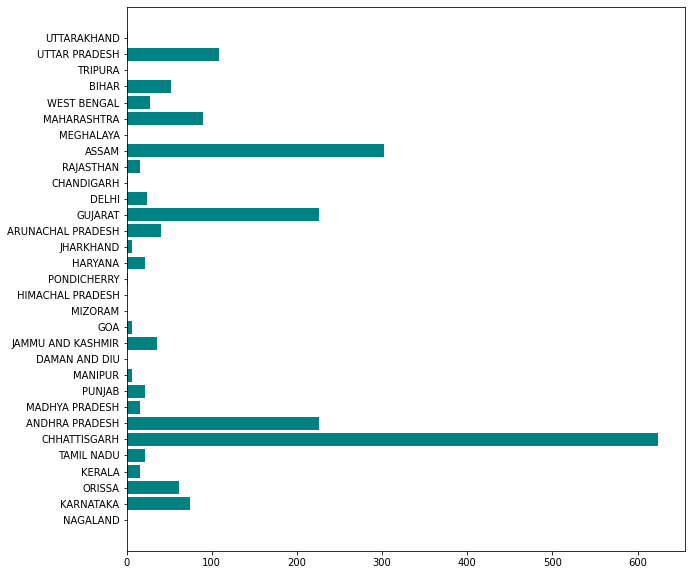

In [ ]:
plt.figure(figsize = (10,10))
plt.barh(india1['State'],india1['Cases_Reported'], color = '#008080')
plt.show()

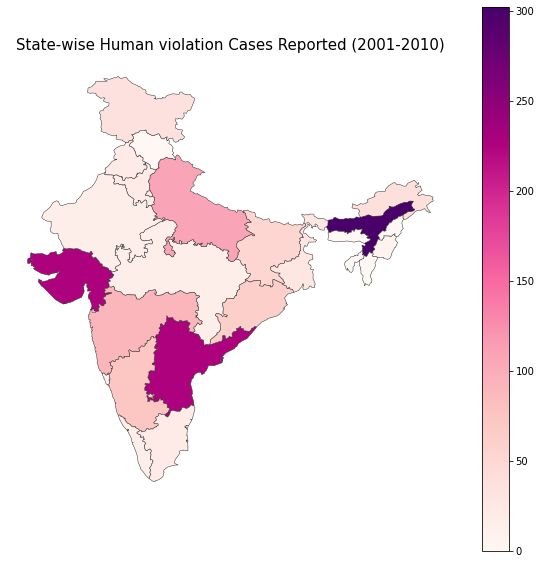

In [ ]:
# import geopandas as gpd

shp_gdf = gpd.read_file('india_st.shp')

merged = shp_gdf.set_index('STATE').join(india1.set_index('State'))
merged['Cases_Reported'].replace('NaN',0,inplace=True)

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Human violation Cases Reported (2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases_Reported', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)


##### **District wise Analysis**

In [ ]:
dataset = spark.read.options(header='True', infershema=True) \
  .csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [ ]:
dataset.printSchema()

root
 |-- STATE/UT: string (nullable = true)
 |-- DISTRICT: string (nullable = true)
 |-- YEAR: string (nullable = true)
 |-- MURDER: string (nullable = true)
 |-- ATTEMPT TO MURDER: string (nullable = true)
 |-- CULPABLE HOMICIDE NOT AMOUNTING TO MURDER: string (nullable = true)
 |-- RAPE: string (nullable = true)
 |-- CUSTODIAL RAPE: string (nullable = true)
 |-- OTHER RAPE: string (nullable = true)
 |-- KIDNAPPING & ABDUCTION: string (nullable = true)
 |-- KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS: string (nullable = true)
 |-- KIDNAPPING AND ABDUCTION OF OTHERS: string (nullable = true)
 |-- DACOITY: string (nullable = true)
 |-- PREPARATION AND ASSEMBLY FOR DACOITY: string (nullable = true)
 |-- ROBBERY: string (nullable = true)
 |-- BURGLARY: string (nullable = true)
 |-- THEFT: string (nullable = true)
 |-- AUTO THEFT: string (nullable = true)
 |-- OTHER THEFT: string (nullable = true)
 |-- RIOTS: string (nullable = true)
 |-- CRIMINAL BREACH OF TRUST: string (nullable = true)

In [ ]:
dataset.show()

+--------------+-----------------+----+------+-----------------+-----------------------------------------+----+--------------+----------+----------------------+-------------------------------------------+----------------------------------+-------+------------------------------------+-------+--------+-----+----------+-----------+-----+------------------------+--------+--------------+-----+------------------+------------+---------------------------------------------------+--------------------------+-----------------------------------+-------------------------------------------+---------------------------+----------------+----------------+
|      STATE/UT|         DISTRICT|YEAR|MURDER|ATTEMPT TO MURDER|CULPABLE HOMICIDE NOT AMOUNTING TO MURDER|RAPE|CUSTODIAL RAPE|OTHER RAPE|KIDNAPPING & ABDUCTION|KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS|KIDNAPPING AND ABDUCTION OF OTHERS|DACOITY|PREPARATION AND ASSEMBLY FOR DACOITY|ROBBERY|BURGLARY|THEFT|AUTO THEFT|OTHER THEFT|RIOTS|CRIMINAL BREACH OF 

In [ ]:
int_features = dataset.columns[2:]
for c in int_features:
  dataset = dataset.withColumn(c,dataset[c].cast('int'))

In [ ]:
dataset.printSchema()

root
 |-- STATE/UT: string (nullable = true)
 |-- DISTRICT: string (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- MURDER: integer (nullable = true)
 |-- ATTEMPT TO MURDER: integer (nullable = true)
 |-- CULPABLE HOMICIDE NOT AMOUNTING TO MURDER: integer (nullable = true)
 |-- RAPE: integer (nullable = true)
 |-- CUSTODIAL RAPE: integer (nullable = true)
 |-- OTHER RAPE: integer (nullable = true)
 |-- KIDNAPPING & ABDUCTION: integer (nullable = true)
 |-- KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS: integer (nullable = true)
 |-- KIDNAPPING AND ABDUCTION OF OTHERS: integer (nullable = true)
 |-- DACOITY: integer (nullable = true)
 |-- PREPARATION AND ASSEMBLY FOR DACOITY: integer (nullable = true)
 |-- ROBBERY: integer (nullable = true)
 |-- BURGLARY: integer (nullable = true)
 |-- THEFT: integer (nullable = true)
 |-- AUTO THEFT: integer (nullable = true)
 |-- OTHER THEFT: integer (nullable = true)
 |-- RIOTS: integer (nullable = true)
 |-- CRIMINAL BREACH OF TRUST: intege

In [ ]:
dataset.describe(dataset.columns).show()

+-------+-------------+-----------------+------------------+------------------+-----------------+-----------------------------------------+------------------+--------------------+------------------+----------------------+-------------------------------------------+----------------------------------+------------------+------------------------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------------+------------------+------------------+------------------+------------------+------------------+---------------------------------------------------+--------------------------+-----------------------------------+-------------------------------------------+---------------------------+------------------+-----------------+
|summary|     STATE/UT|         DISTRICT|              YEAR|            MURDER|ATTEMPT TO MURDER|CULPABLE HOMICIDE NOT AMOUNTING TO MURDER|              RAPE|      CUSTODIAL RAPE|        

In [ ]:

g = dataset.select('Year').distinct()

for i in range(1,len(int_features)):
  a = dataset.groupby(['Year']).agg({int_features[i]:'sum'})
  g = g.join(a, on=['Year'],how='outer')

g.show()


+----+-----------+----------------------+----------------------------------------------+---------+-------------------+---------------+---------------------------+------------------------------------------------+---------------------------------------+------------+-----------------------------------------+------------+-------------+----------+---------------+----------------+----------+-----------------------------+-------------+-------------------+----------+-----------------------+-----------------+--------------------------------------------------------+-------------------------------+----------------------------------------+------------------------------------------------+--------------------------------+---------------------+---------------------+
|Year|sum(MURDER)|sum(ATTEMPT TO MURDER)|sum(CULPABLE HOMICIDE NOT AMOUNTING TO MURDER)|sum(RAPE)|sum(CUSTODIAL RAPE)|sum(OTHER RAPE)|sum(KIDNAPPING & ABDUCTION)|sum(KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS)|sum(KIDNAPPING AND ABDUCTIO

In [ ]:
g.describe(g.columns).show()

+-------+------------------+-----------------+----------------------+----------------------------------------------+------------------+-------------------+------------------+---------------------------+------------------------------------------------+---------------------------------------+-----------------+-----------------------------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------------------+------------------+-------------------+------------------+-----------------------+------------------+--------------------------------------------------------+-------------------------------+----------------------------------------+------------------------------------------------+--------------------------------+---------------------+---------------------+
|summary|              Year|      sum(MURDER)|sum(ATTEMPT TO MURDER)|sum(CULPABLE HOMICIDE NOT AMOUNTING TO MURDER)|         sum(RAPE)|sum(CUSTODIAL

In [ ]:
g = g.orderBy(f.col('Year').asc())

plot1 = g.toPandas()

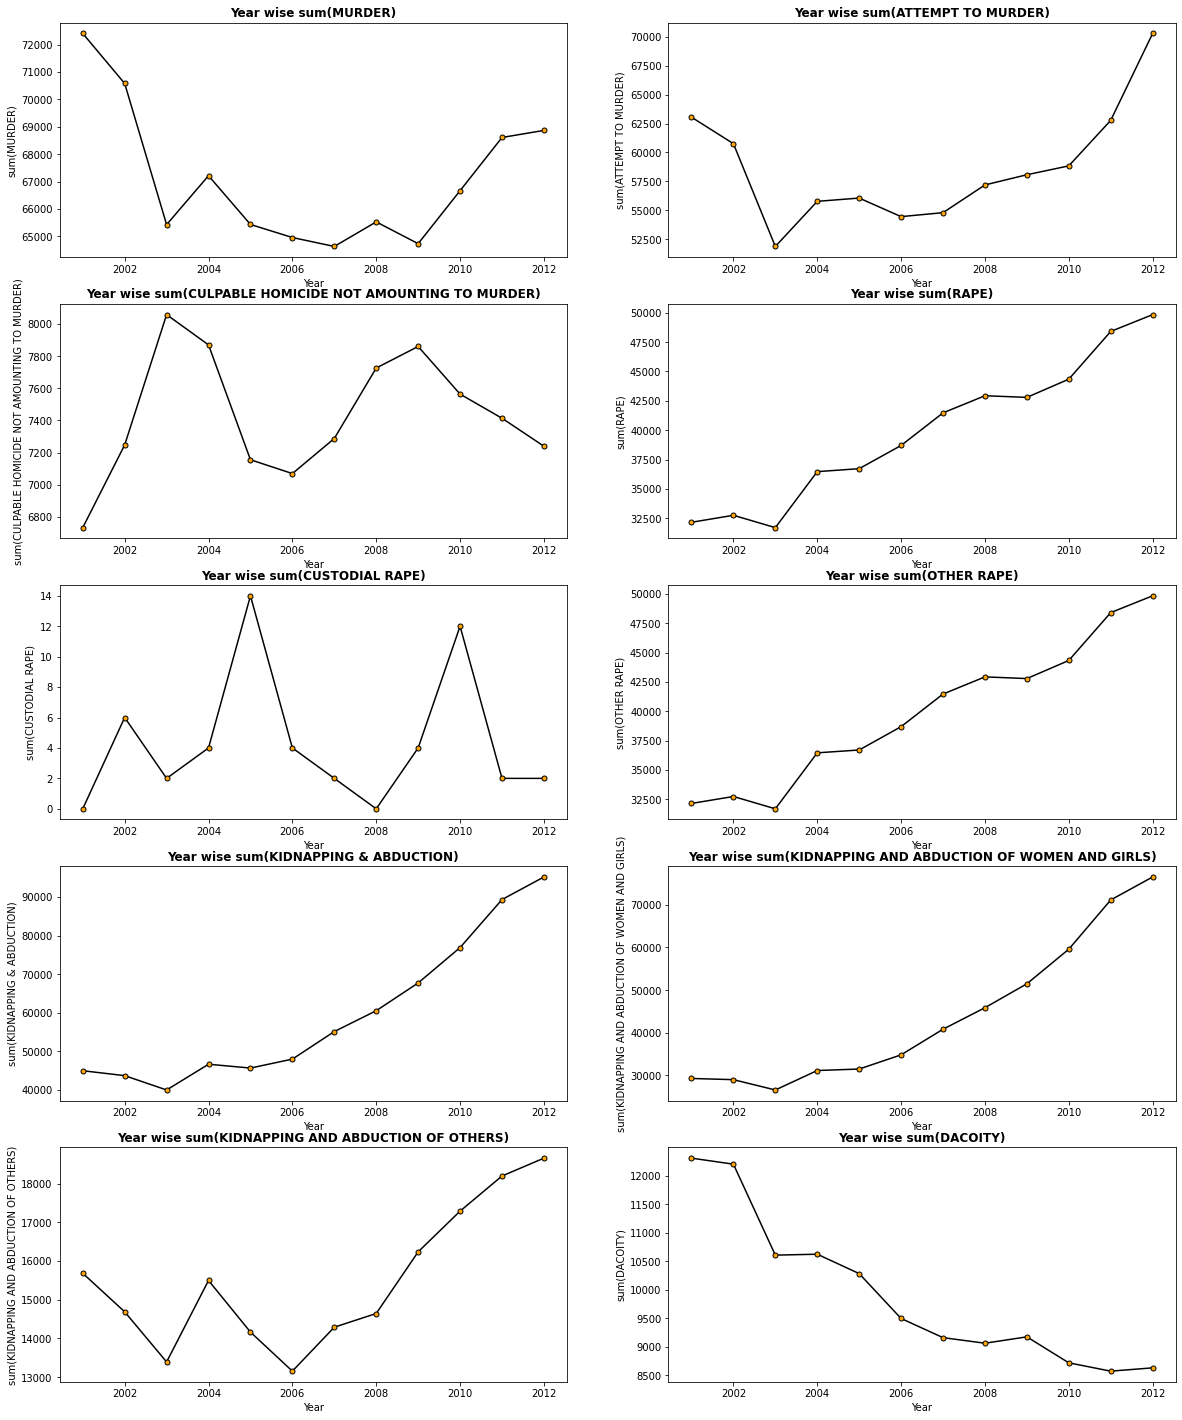

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,25))

for i in range(1,11):
  plt.subplot(5,2,i)
  plt.plot(plot1['Year'],plot1[plot1.columns[i]],c = 'black', marker = 'o',markerfacecolor = 'orange',markersize = 5)
  plt.title('Year wise '+ plot1.columns[i],weight = 'bold')
  plt.xlabel('Year')
  plt.ylabel(plot1.columns[i])
# plt.savefig('fig_1.jpg',bbox_inches='tight')
plt.show()

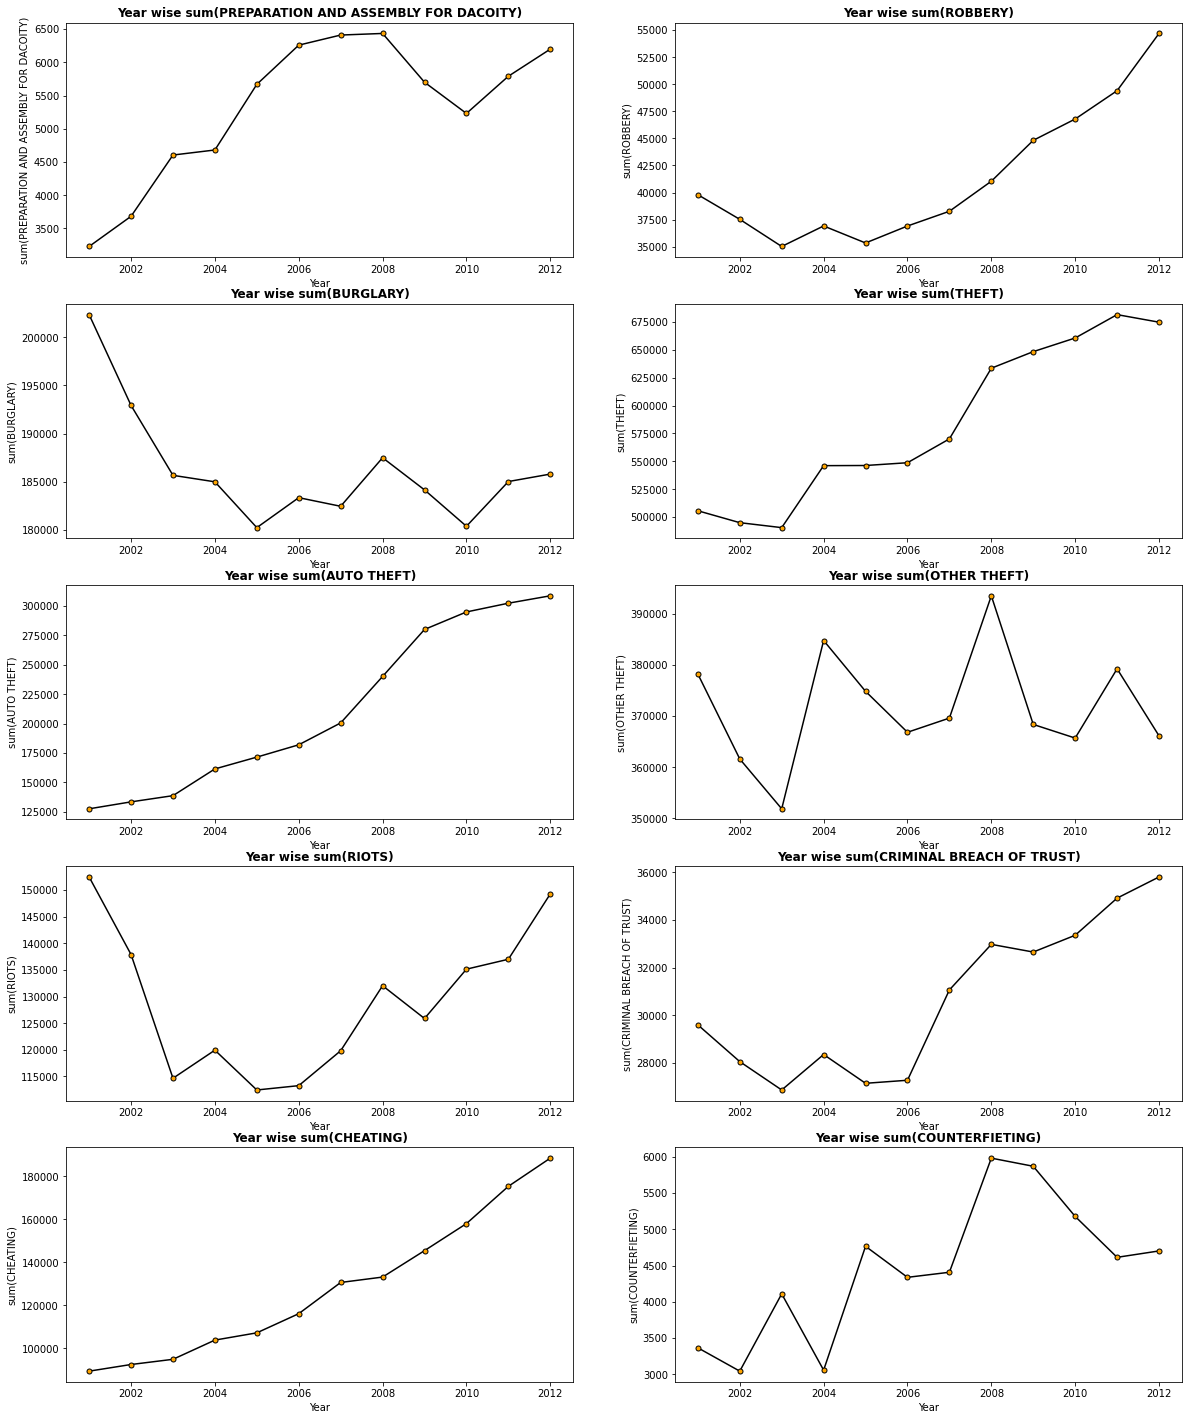

In [ ]:
plt.figure(figsize=(20,25))

for i in range(1,11):
  plt.subplot(5,2,i)
  plt.plot(plot1['Year'],plot1[plot1.columns[i+10]],c = 'black', marker = 'o',markerfacecolor = 'orange',markersize = 5)
  plt.title('Year wise '+ plot1.columns[i+10],weight = 'bold')
  plt.xlabel('Year')
  plt.ylabel(plot1.columns[i+10])
# plt.savefig('fig_2.jpg',bbox_inches='tight')
plt.show()

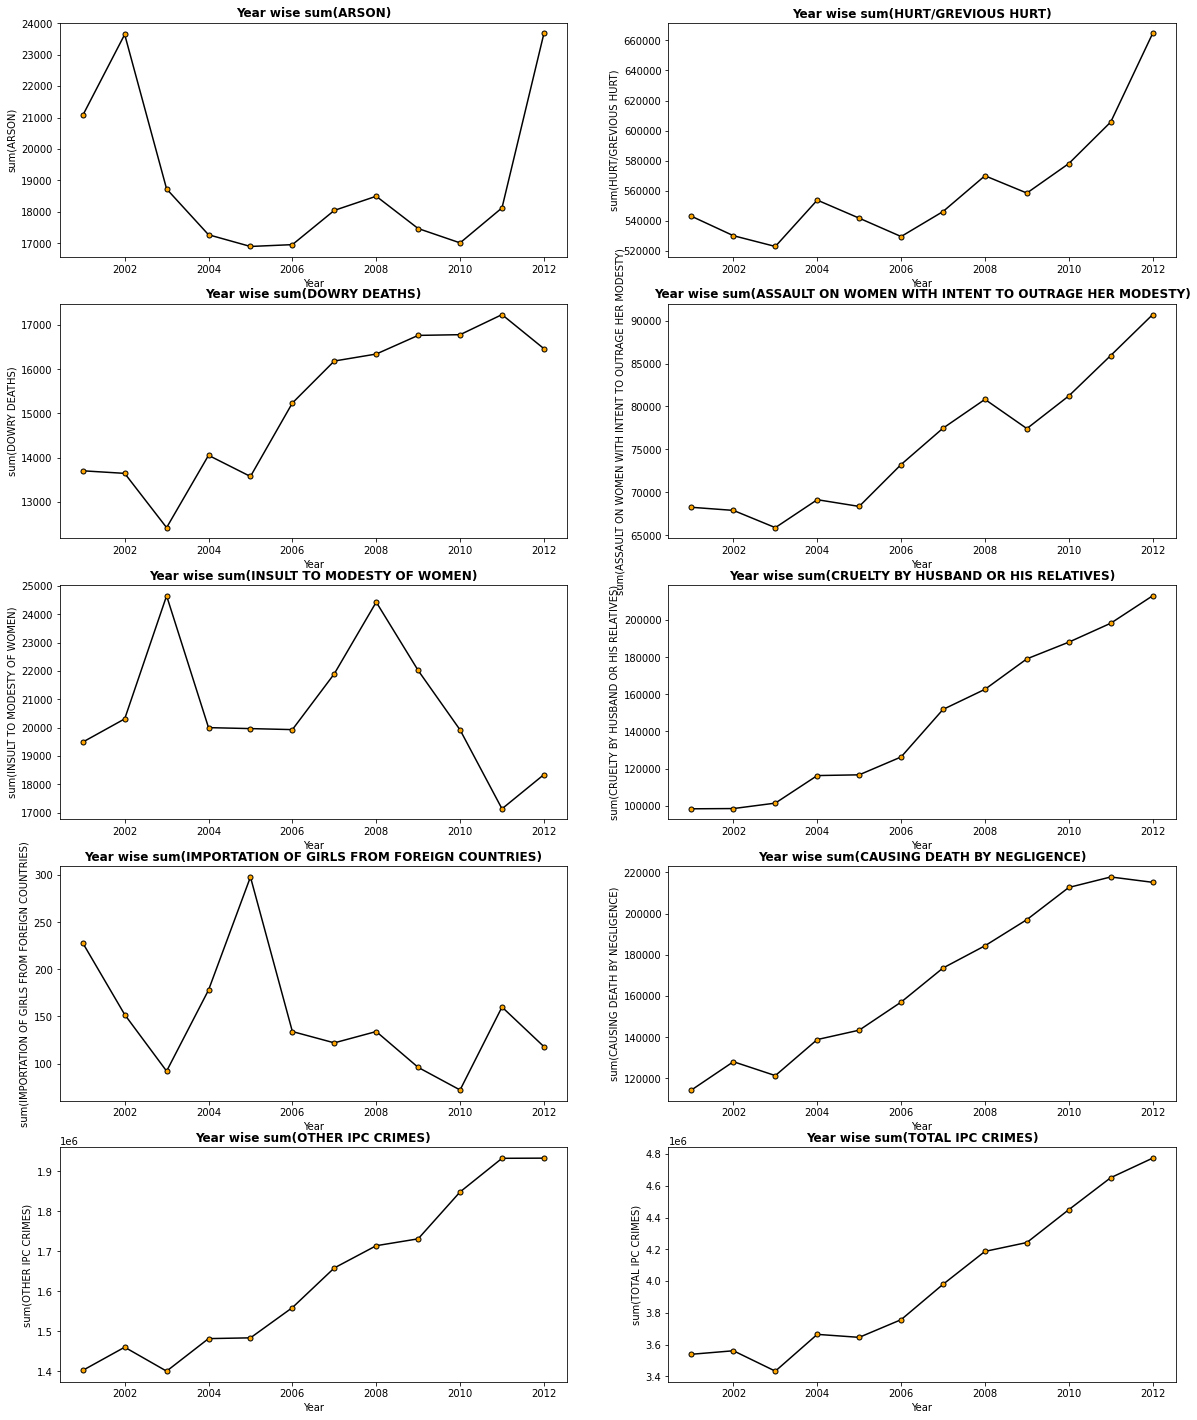

In [ ]:
plt.figure(figsize=(20,25))

for i in range(1,11):
  plt.subplot(5,2,i)
  plt.plot(plot1['Year'],plot1[plot1.columns[i+20]],c = 'black', marker = 'o',markerfacecolor = 'orange',markersize = 5)
  plt.title('Year wise '+ plot1.columns[i+20],weight = 'bold')
  plt.xlabel('Year')
  plt.ylabel(plot1.columns[i+20])
# plt.savefig('fig_3.jpg',bbox_inches='tight')
plt.show()

In [ ]:
g = dataset.select('State/UT').distinct()
g.show()

+----------------+
|        State/UT|
+----------------+
|          SIKKIM|
|       MEGHALAYA|
|     WEST BENGAL|
|     DAMAN & DIU|
|   A & N ISLANDS|
|             GOA|
|    CHHATTISGARH|
|       RAJASTHAN|
|         TRIPURA|
|HIMACHAL PRADESH|
|         GUJARAT|
|           BIHAR|
|      CHANDIGARH|
|       KARNATAKA|
| JAMMU & KASHMIR|
|   UTTAR PRADESH|
|        DELHI UT|
|         MANIPUR|
|     LAKSHADWEEP|
|  MADHYA PRADESH|
+----------------+
only showing top 20 rows



In [ ]:
for i in range(1,len(int_features)):
  a = dataset.groupby(['State/UT']).agg({int_features[i]:'sum'})
  g = g.join(a, on=['State/UT'],how='outer')

g.show()


+----------------+-----------+----------------------+----------------------------------------------+---------+-------------------+---------------+---------------------------+------------------------------------------------+---------------------------------------+------------+-----------------------------------------+------------+-------------+----------+---------------+----------------+----------+-----------------------------+-------------+-------------------+----------+-----------------------+-----------------+--------------------------------------------------------+-------------------------------+----------------------------------------+------------------------------------------------+--------------------------------+---------------------+---------------------+
|        State/UT|sum(MURDER)|sum(ATTEMPT TO MURDER)|sum(CULPABLE HOMICIDE NOT AMOUNTING TO MURDER)|sum(RAPE)|sum(CUSTODIAL RAPE)|sum(OTHER RAPE)|sum(KIDNAPPING & ABDUCTION)|sum(KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS)|sum

In [ ]:
g = g.toPandas()
g

,State/UT,sum(MURDER),sum(ATTEMPT TO MURDER),sum(CULPABLE HOMICIDE NOT AMOUNTING TO MURDER),sum(RAPE),sum(CUSTODIAL RAPE),sum(OTHER RAPE),sum(KIDNAPPING & ABDUCTION),sum(KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS),sum(KIDNAPPING AND ABDUCTION OF OTHERS),sum(DACOITY),sum(PREPARATION AND ASSEMBLY FOR DACOITY),sum(ROBBERY),sum(BURGLARY),sum(THEFT),sum(AUTO THEFT),sum(OTHER THEFT),sum(RIOTS),sum(CRIMINAL BREACH OF TRUST),sum(CHEATING),sum(COUNTERFIETING),sum(ARSON),sum(HURT/GREVIOUS HURT),sum(DOWRY DEATHS),sum(ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY),sum(INSULT TO MODESTY OF WOMEN),sum(CRUELTY BY HUSBAND OR HIS RELATIVES),sum(IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES),sum(CAUSING DEATH BY NEGLIGENCE),sum(OTHER IPC CRIMES),sum(TOTAL IPC CRIMES)
0,SIKKIM,332,222,76,390,0,390,152,124,28,12,0,128,1754,2038,188,1850,514,108,700,38,160,1878,4,460,28,88,0,844,4074,14000
1,MEGHALAYA,3460,1202,168,2040,0,2040,1458,528,930,1596,34,1944,3776,12008,2932,9076,294,614,2030,176,886,3472,30,1064,16,330,8,1364,12528,50498
2,WEST BENGAL,42112,29386,12666,41574,0,41574,51998,43546,8452,5284,21614,14708,11000,380936,76128,304808,102308,17838,61662,3842,4728,188304,10344,45742,3108,261336,228,75502,852388,2238608
3,DAMAN & DIU,136,76,4,40,0,40,62,30,32,68,2,46,960,1128,684,444,532,134,146,60,68,380,6,30,4,70,0,622,1322,5896
4,A & N ISLANDS,320,130,42,218,0,218,188,154,34,30,0,148,1784,2248,170,2078,280,144,506,22,196,2210,12,428,86,242,0,84,8886,18204
5,GOA,974,538,134,700,0,700,472,328,144,110,0,596,7400,16090,5754,10336,1626,1122,2352,324,544,4574,38,656,246,382,0,5328,19896,64102
6,CHHATTISGARH,24120,15820,696,23676,0,23676,6690,5260,1430,2936,336,10226,89312,125746,40390,85356,21794,3410,13996,1156,6294,170052,2284,38330,3450,19146,10,50864,491710,1122054
7,RAJASTHAN,31688,42684,1778,31596,0,31596,61454,49342,12112,1126,1562,18142,130536,465948,210714,255234,72146,19348,281600,1452,16624,534706,10132,61706,708,200202,12,156700,1569982,3711832
8,TRIPURA,4044,1362,38,4116,0,4116,2886,1750,1136,452,20,1554,4808,9246,1218,8028,4050,762,1704,266,1096,18612,628,5546,78,13028,0,3084,28088,105468
9,HIMACHAL PRADESH,2908,1670,260,3608,0,3608,3596,3082,514,90,2,472,19378,19316,5904,13412,14152,2598,5306,108,2968,31818,110,7194,878,6490,0,12618,174356,309896


In [ ]:
old = ['A & N ISLANDS','D & N HAVELI','JAMMU & KASHMIR','PUDUCHERRY','DAMAN & DIU	','ODISHA	','DELHI UT']
new = ['Andaman and Nicobar Islands','Dadra and Nagar Haveli','Jammu and Kashmir','Pondicherry','Daman and Diu','Orissa','Delhi']


In [ ]:
for i in g.columns[2:]:
  g['sum(MURDER)'] = g['sum(MURDER)'] + g[i]

In [ ]:
g.replace(to_replace=old,value=new,inplace=True)
g.replace('ODISHA','Orissa',inplace=True)
g['State/UT'] = g['State/UT'].str.upper()


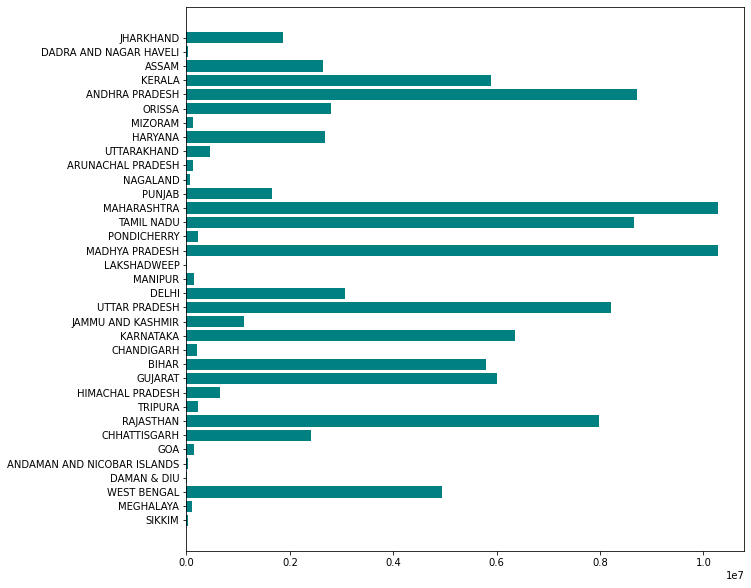

In [ ]:
plt.figure(figsize = (10,10))
plt.barh(g['State/UT'],g['sum(MURDER)'], color = '#008080')
plt.savefig('fig_4.jpg',bbox_inches='tight')
plt.show()

32


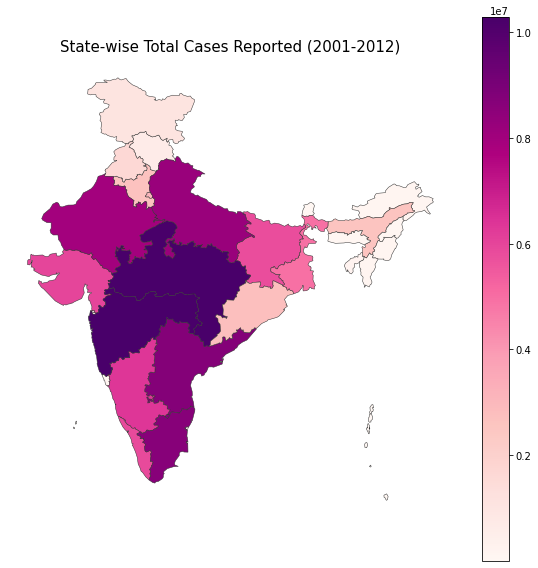

In [ ]:
# import geopandas as gpd
# g['State/UT'] = g['State/UT'].str.upper()
shp_gdf = gpd.read_file('india_st.shp')

merged = shp_gdf.set_index('STATE').join(g.set_index('State/UT'))
merged['sum(MURDER)'].replace('NaN',0,inplace=True)
print(len(merged))
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Total Cases Reported (2001-2012)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})

fig = merged.plot(column='sum(MURDER)', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
# plt.savefig('fig_5.jpg',bbox_inches='tight')
